## import module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# 한글깨짐 방지
plt.rc('font', family='AppleGothic')

## dataset load
- titanic, iris dataset

In [2]:
# titanic dataset
titanic = sns.load_dataset('titanic')
print(titanic.shape)
print(titanic.describe())
print(titanic.info())
print(titanic.columns)

(891, 15)
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex   

In [3]:
# iris dataset
iris = sns.load_dataset('iris')
print(iris.shape)
print(iris.info())
print(iris.columns)

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
# titanic 클래스별로 구분하여 인원 정보 출력
titanic.groupby('pclass').count()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
pclass,,,,,,,,,,,,,,
1,216,216,186,216,216,216,214,216,216,216,175,214,216,216
2,184,184,173,184,184,184,184,184,184,184,16,184,184,184
3,491,491,355,491,491,491,491,491,491,491,12,491,491,491


In [5]:
# 클래스별 탑승인원의 생존율 분석
print(titanic.groupby('class')['survived'].count())
print(titanic.pivot_table('survived', index = 'class', columns = 'who'))

class
First     216
Second    184
Third     491
Name: survived, dtype: int64
who        child       man     woman
class                               
First   0.833333  0.352941  0.978022
Second  1.000000  0.080808  0.909091
Third   0.431034  0.119122  0.491228


In [6]:
# iris dataset 종류별로 저장하기
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")
versicolor = iris.query("species == 'versicolor'")

print(setosa.head())
print(virginica.head())
print(versicolor.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica
103           6.3          2.9           5.6          1.8  virginica
104           6.5          3.0           5.8          2.2  virginica
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versic

## seaborn

## 그래프 그리기
1. barplot
2. countplot
3. histplot
4. distplot
5. scatterplot
6. jointplot
7. heatmap
8. pairplot
9. kdeplot
10. lmplot
11. replot
12. boxplot
13. violinplot
14. stripplot
15. swarmplot
16. catplot

In [8]:
# darkgrid 효과 넣고 싶으면 넣기
# sns.set(style = 'darkgrid

### 1. barplot
- barplot : 막대그래프
    - x, y : x축(범주형 데이터), y축(연속형 데이터)
    - data : 적용할 데이터 프레임
    - hue : 특성을 구분할 컬럼
    - errwidth : 에러 바의 두께 지정
    - estimator : 기본값은 평균(np.mean)

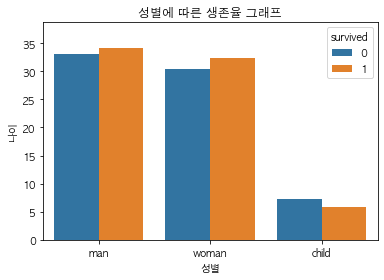

In [9]:
ax = plt.subplots()
ax = sns.barplot(x = 'who', y = 'age', hue = 'survived', data = titanic, errwidth = 0)
ax.set_title('성별에 따른 생존율 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('나이');

<AxesSubplot:xlabel='age', ylabel='who'>

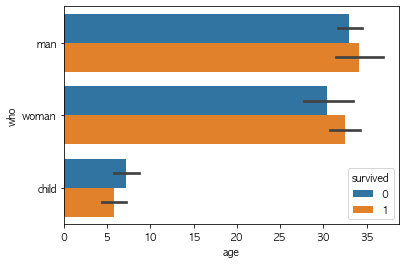

In [13]:
# 가로 막대 그래프
sns.barplot(y = 'who', x = 'age', hue = 'survived', data = titanic) # errorbar 파라미터 없앰

### 2. countplot
- countplot : 막대그래프
    - **범주형 데이터**의 개수를 세서 막대그래프로 표현
        - x: dataframe의 열 이름 문자열을 지정
        - data : 대상이 되는 dataframe
        - hue : 특성을 구분할 컬럼 지정
        - order : 열거할 데이터의 순서
        - linewidth : 테두리 선의 두께 지정
        - edgecolor : Bar의 테두리 색상을 지정할 때 사용
        - palette : 색상 팔레트를 지정

Text(0.5, 1.0, 'iris 종의 개수')

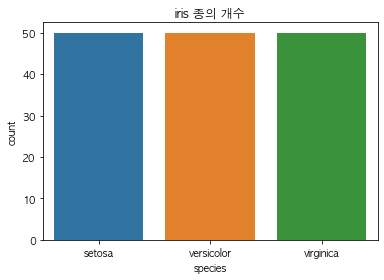

In [16]:
sns.countplot(x='species', data = iris)
plt.title('iris 종의 개수')

Text(0.5, 1.0, '클래스별 생존율')

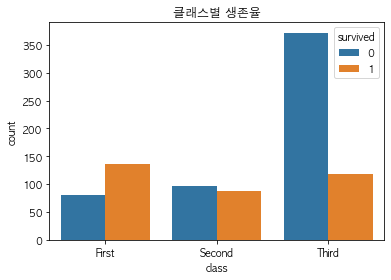

In [21]:
sns.countplot(x='class', hue = 'survived', data=titanic)
plt.title('클래스별 생존율')

### 3. histplot
- histplot : **일변량 수치형 데이터**
    - x : 히스토그램을 그릴 데이터 컬럼
    - data : 그리고자 하는 데이터 셋
    - kde : True면 커널 밀도 그래프를 동시에 그림
    - bins : x축에 보여지는 계급의 개수

Text(0.5, 1.0, 'iris의 setosa의 sepal length')

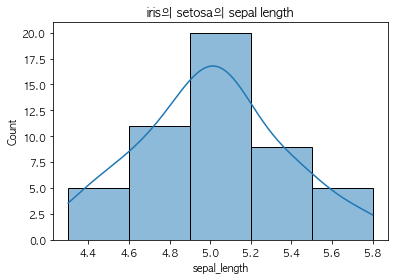

In [37]:
sns.histplot(setosa['sepal_length'], kde = True, bins=5)
# sns.histplot(x = 'sepal_length', data=setosa)
plt.title('iris의 setosa의 sepal length')

Text(0.5, 1.0, '타이타닉 탑승객 나이 분포')

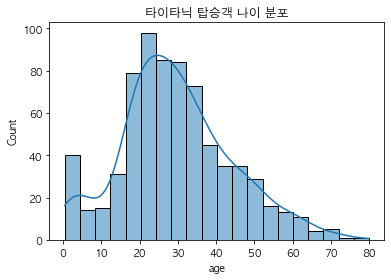

In [36]:
sns.histplot(x = 'age', kde = True, data = titanic )
plt.title('타이타닉 탑승객 나이 분포')

### 4. distplot()
    - 매개 변수
        - x : Series, 1d-array, list 사용
        - bins : 계급의 개수를 지정하는 매개변수
        - hist : True이면 히스토그램을 그림
        - kde : histogram보다 부드러운 형태의 분포 곡선을 보여주는 방법. True이면 Kernel density형식으로 보여줌
        - vertical : True면 가로로 그래프를 그림 (default : vertical = False)
        - color : 색상을 지정
        - rug : True이면 rug(선분) 보여줌
- **1차원** 데이터
- 러그와 커널밀도표시 기능이 있어서 많이 사용
- 일변량 데이터에 사용 

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '타이타닉 탑승객 나이 분포')

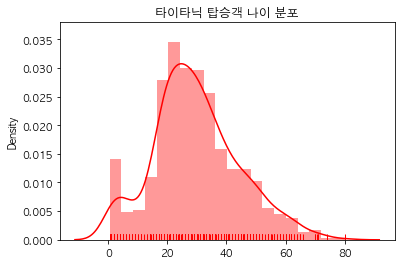

In [40]:
# x = titanic['age']
sns.distplot(x=titanic['age'], rug=True, hist=True, kde=True, color = 'r')
plt.title('타이타닉 탑승객 나이 분포')

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2064: FutureWarning: Using `vertical=True` to

Text(0.5, 1.0, 'iris의 setosa sepal length 분포')

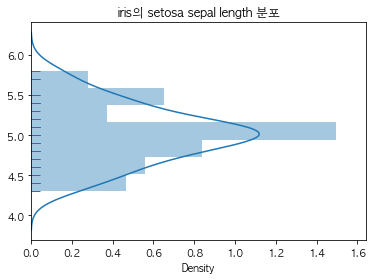

In [42]:
sns.distplot(x = setosa['sepal_length'], rug=True, vertical  = True, kde=True)
plt.title('iris의 setosa sepal length 분포')

### 5. scatterplot
- scatterplot : 산점도 그래프
    - x, y : 산점도의 x축, y축에 놓여질 데이터
    - data : 사용하고자 하는 데이터 셋
    - hue : 항목별로 다른 색상을 지정하고자 할 때
    - style : 그려질 모양 구분
    - s : marker size 구분

Text(0.5, 1.0, '타이타닉 나이에 따른 운임요금 분포')

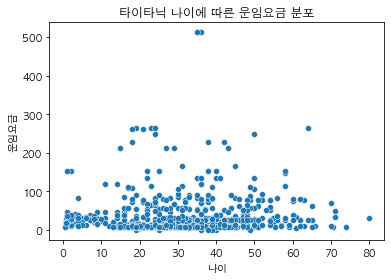

In [46]:
sns.scatterplot(x = 'age', y='fare', data=titanic)
plt.xlabel('나이')
plt.ylabel('운임요금')
plt.title('타이타닉 나이에 따른 운임요금 분포')

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


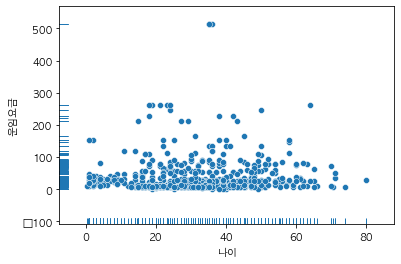

In [48]:
ax = plt.subplots()
sns.scatterplot(x = 'age', y = 'fare', data = titanic) # scatter
ax = sns.rugplot(x = 'age', y = 'fare', data = titanic) # rug plot
ax.set_xlabel('나이')
ax.set_ylabel('운임요금');

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


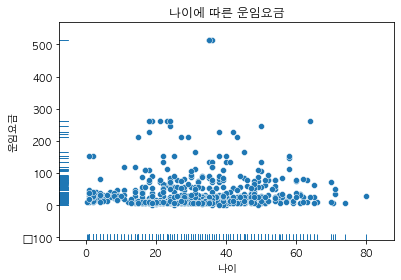

In [50]:
ax = plt.subplots()
sns.scatterplot(data=titanic, x='age', y='fare')
ax = sns.rugplot(data=titanic, x='age', y='fare') # 같은 축을 이용해서 그래프를 그림
ax.set_title('나이에 따른 운임요금')
ax.set_xlabel('나이')
ax.set_ylabel('운임요금');
# FileSave()

### 6. jointplot
- jointplot : 중앙에 산점도, 차트의 가장자리에 히스토그램을 동시에 그리는 함수
    - **숫자형 데이터**만 표현 가능
    - kind 옵션 : 차트의 종류를 지정
        - 'scatter' : scatter plott
        - 'hex' : 육각형 모양의 밀도
        - 'reg' : 선형 관계를 위한 회귀선
        - 'kde' : 데이터의 밀집도를 보다 부드러운 선으로 확인

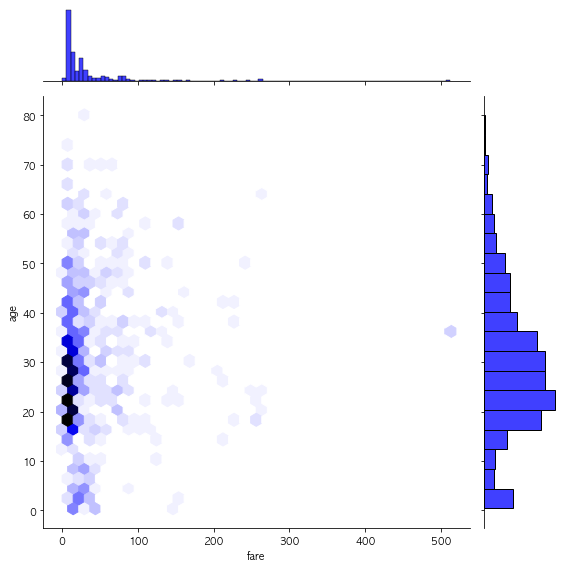

In [52]:
# plt.figure()
sns.jointplot(x = 'fare', y = 'age', data = titanic, height = 8, kind = 'hex', color = 'b')
# plt.title('나이에 따른 운임요금 현황');

### 7. heatmap
- heatmap : 데이터가 2차원이고, 모든 값이 카테고리의 값으로 구성되어 있는 경우
    - 1D 데이터를 2D로 바꾸기 위해 pivot_table 사용
    - 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지 위에 표 형태로 출력
    - annot 매개변수 값이 True면, cell에 해당하는 수치 값 보여줌

who        child       man     woman
class                               
First   0.833333  0.352941  0.978022
Second  1.000000  0.080808  0.909091
Third   0.431034  0.119122  0.491228


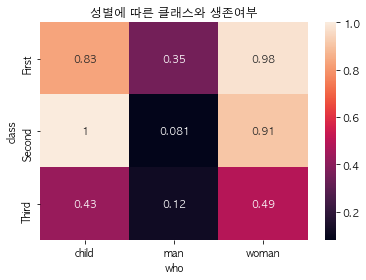

In [55]:
# heatmap을 위해서는 pivot table로 2D여야함
pivot = titanic.pivot_table(index = 'class', columns='who', values='survived')
print(pivot)

sns.heatmap(data=pivot, annot=True)
plt.title('성별에 따른 클래스와 생존여부')
plt.show()

### 8. pairplot
- sns.pairplot()
    - 매개변수
        - data : 적용할 dataframe
        - hue : 특성을 구분할 컬럼 지정
        - palette : 팔레트 지정
        - height : 각 facet의 높이를 inches로 지정 (default = 2.5)
        - markers : 마킹될 도형의 모양 지정
            - ex) markers = ['o', 's', 'D', 'p']
- **3차원** 이상의 다차원 **실수형** 데이터
- pairplot 함수는 dataset 중에서 각각 2개 컬럼들간의 관계를 그래프로 그려줌
- 단순히 data 매개 변수만 사용하는 경우 
    - 동일한 데이터가 만나는 대각선 영역 : 히스토그램
    - 서로 다른 데이터가 만나는 영역 : 산점도 그래프

     survived     fare   age  pclass
0           0   7.2500  22.0       3
1           1  71.2833  38.0       1
2           1   7.9250  26.0       3
3           1  53.1000  35.0       1
4           0   8.0500  35.0       3
..        ...      ...   ...     ...
886         0  13.0000  27.0       2
887         1  30.0000  19.0       1
888         0  23.4500   NaN       3
889         1  30.0000  26.0       1
890         0   7.7500  32.0       3

[891 rows x 4 columns]


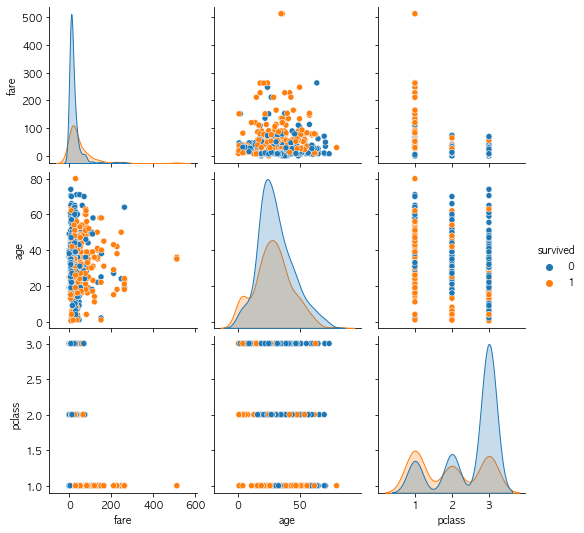

In [56]:
new_titanic = titanic.loc[:, ['survived', 'fare', 'age', 'pclass']]
print(new_titanic)
sns.pairplot(data=new_titanic, hue='survived')

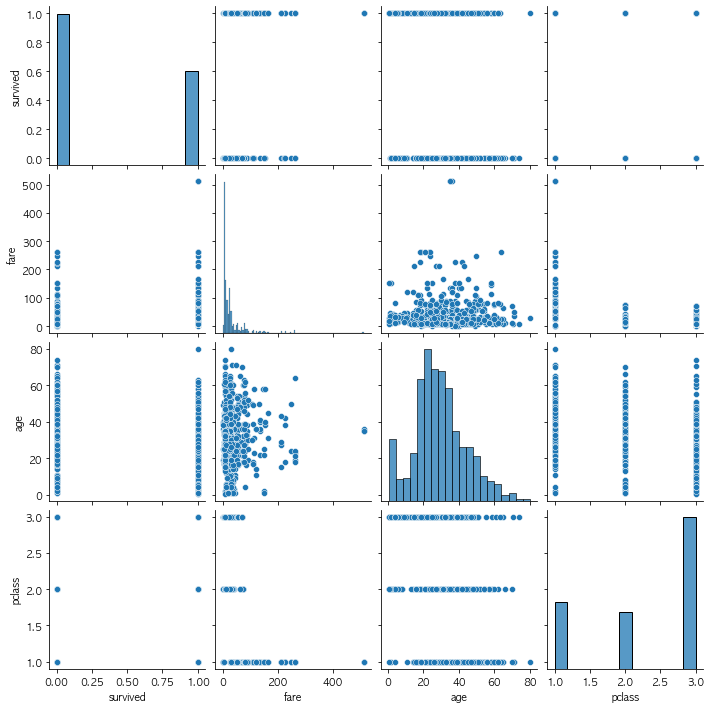

In [57]:
sns.pairplot(data=new_titanic)

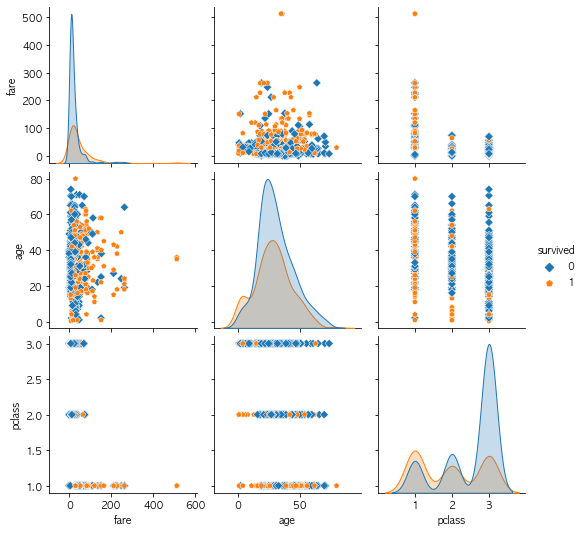

In [60]:
sns.pairplot(data=new_titanic, hue='survived', markers = ['D', 'p']) # marker는 hue 특성의 개수만큼

### 9. kdeplot
- kdeplot : **이차원** 밀집도
    - 히스토그램 같은 데이터의 분포를 smoothing하여 그려주는 기법
    - 이산화 되어 있는 변수를 연속적으로 보여줌
    - 항목
        - data : x축에 그려질 데이터
        - data2 : y축에 그려질 데이터
        - shade : True면 그림자 효과
        - color : 색상
        - label : 레이블 지정
        - alpha : 불투명도 지정

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'age')

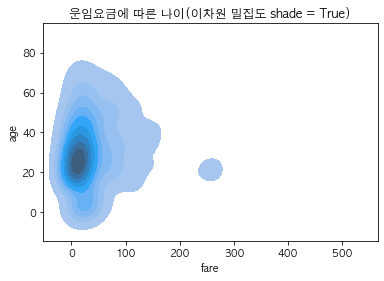

In [63]:
kde, ax = plt.subplots()
ax = sns.kdeplot(data = titanic['fare'], data2 = titanic['age'], shade = True)
ax.set_title('운임요금에 따른 나이(이차원 밀집도 shade = True)')
ax.set_xlabel('fare')
ax.set_ylabel('age')

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '나이')

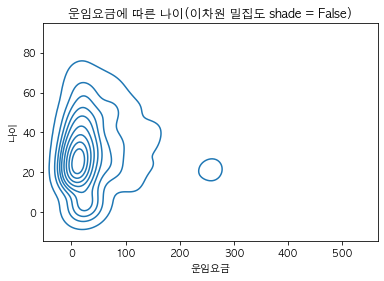

In [64]:
kde, ax = plt.subplots()
ax = sns.kdeplot(data = titanic['fare'], data2 = titanic['age'], shade = False)
ax.set_title('운임요금에 따른 나이(이차원 밀집도 shade = False)')
ax.set_xlabel('운임요금')
ax.set_ylabel('나이')

Text(0, 0.5, '값')

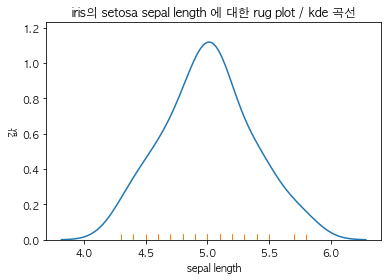

In [65]:
ax = plt.subplots()
sns.kdeplot(x = 'sepal_length', data = setosa) # kde plot
ax = sns.rugplot(x = 'sepal_length', data = setosa) # rug plot
ax.set_title('iris의 setosa sepal length 에 대한 rug plot / kde 곡선')
ax.set_xlabel('sepal length')
ax.set_ylabel('값')

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

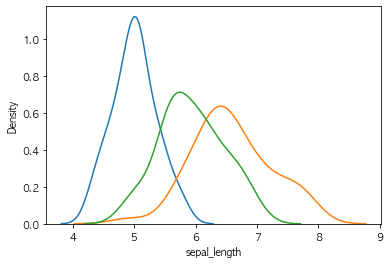

In [66]:
sns.kdeplot(setosa['sepal_length'])
sns.kdeplot(virginica['sepal_length'])
sns.kdeplot(versicolor['sepal_length'])

### 10. 선형 회귀 모델 그래프(Lmplot) - linear regression model
- sns.lmplot()
    - 매개변수
        - x, y : x축과 y축에 그려질 데이터를 명시
        - data : 사용할 dataframe 지정
        - hue : 구분할 컬럼 지정
        - height : 각 항목의 면(facet)에 대한 높이를 Inch단위로 지정 (default : 2.5)
        - col = '성별' : 항목별 그래프를 별도로 그려볼 수 있음
        - col_wrap=숫자 : 한 줄에 표기할 column의 개수를 명시
        - scatter_kws : scatter관련 keyword를 사전 형식으로 지정
            - ex) scatter_kws = dict(s=60, linewidths=.7, edgecolors ='black')
- 선형 회귀 모델과 연관이 있는 함수로써 column 간의 선형적인 관계를 확인
- 이상치 데이터도 짐작 가능

Text(0.5, 1.0, 'titanic 탑승 나이에 따른 운임요금')

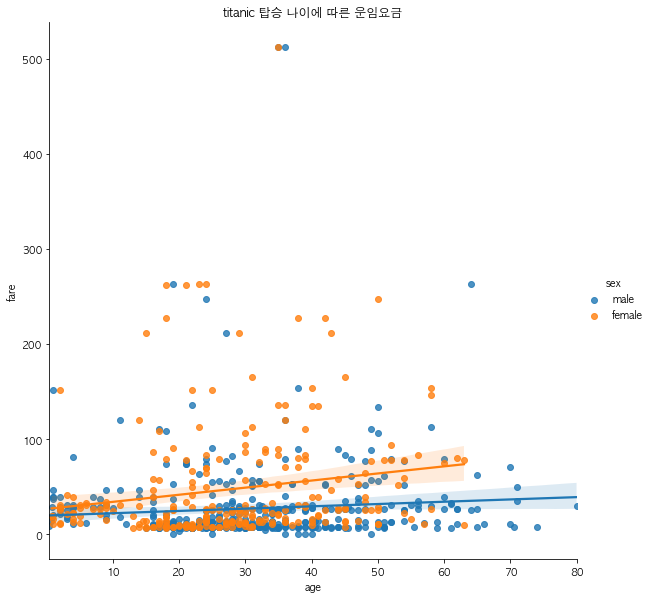

In [70]:
sns.lmplot(x='age', y='fare', hue='sex', height=8, data=titanic)
plt.title('titanic 탑승 나이에 따른 운임요금')

(0.0, 250.0)

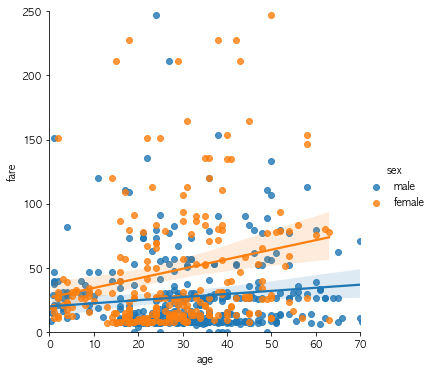

In [71]:
sns.lmplot(x = 'age', y = 'fare', data = titanic, hue = 'sex')
plt.xlim(0, 70)
plt.ylim(0, 250)

### 11. replot()
- 두 column 간 상관 관계를 보여주지만, Lmplot처럼 선형 관계를 따로 그려주지는 않음

(0.0, 250.0)

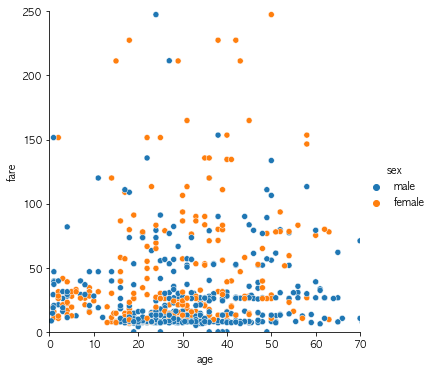

In [73]:
sns.relplot(x = 'age', y = 'fare', data = titanic, hue = 'sex')
plt.xlim(0, 70)
plt.ylim(0, 250)

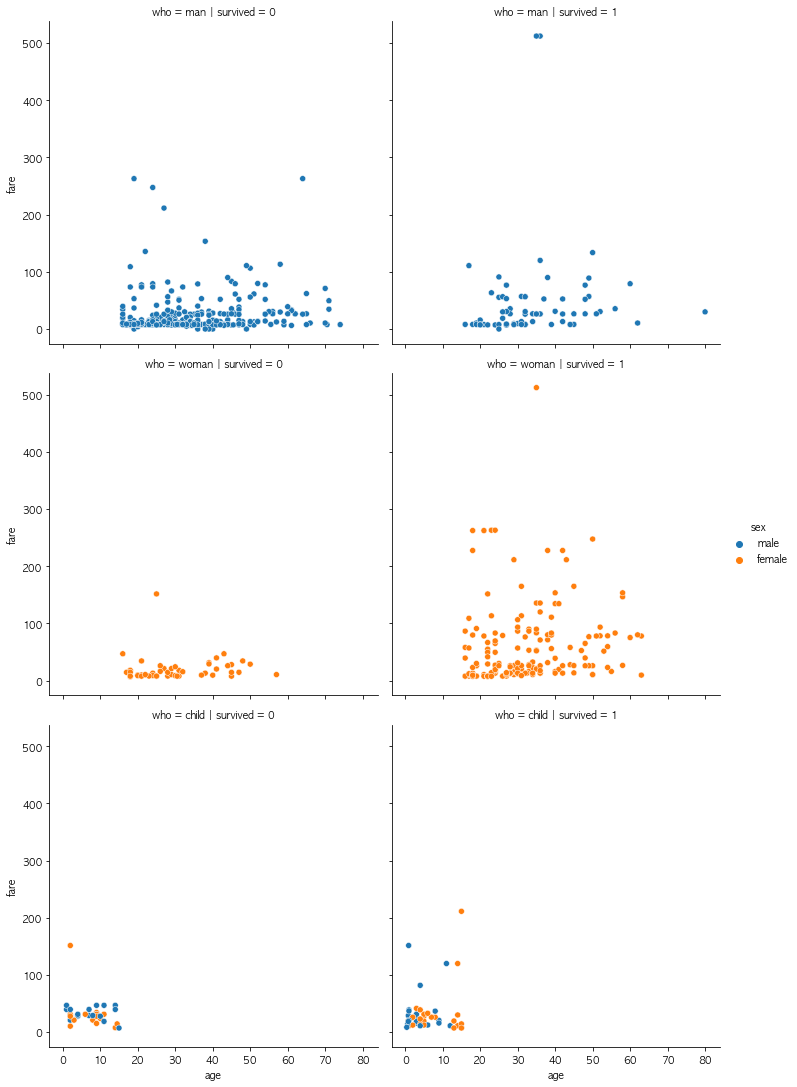

In [72]:
sns.relplot(x='age', y='fare', hue='sex', col='survived', row='who', data=titanic)

### 12. boxplot
- boxplot : 상자 수염 그래프

Text(0, 0.5, '운임요금')

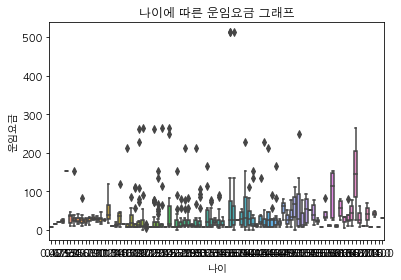

In [75]:
ax = plt.subplots()
ax = sns.boxplot(x = 'age', y = 'fare', data = titanic)
ax.set_title('나이에 따른 운임요금 그래프')
ax.set_xlabel('나이')
ax.set_ylabel('운임요금')

Text(0, 0.5, '운임요금')

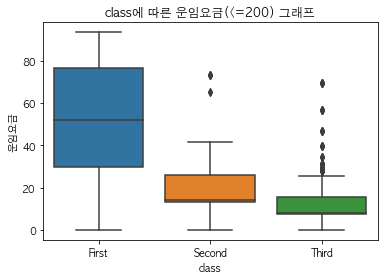

In [86]:
new_titanic = titanic.loc[titanic['fare']<=100]

ax = plt.subplots()
ax = sns.boxplot(x = 'class', y = 'fare', data = new_titanic)
ax.set_title('class에 따른 운임요금(<=200) 그래프')
ax.set_xlabel('class')
ax.set_ylabel('운임요금')

Text(0, 0.5, '나이')

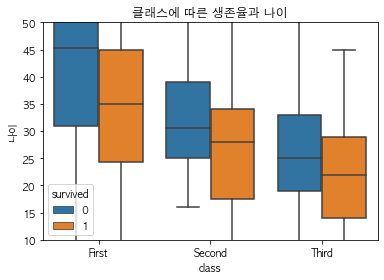

In [91]:
plt.figure()
ax = sns.boxplot(x = 'class', y = 'age', data = titanic, hue = 'survived')
ax.set_ylim(10, 50)
ax.set_title('클래스에 따른 생존율과 나이')
ax.set_xlabel('class')
ax.set_ylabel('나이')

Text(0, 0.5, '운임요금')

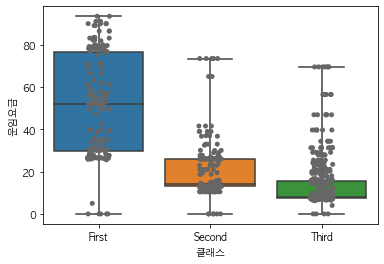

In [93]:
# boxplot + stripplot
plt.figure()
ax = sns.boxplot(x = 'class', y = 'fare', data = new_titanic, whis=np.inf) # whis : upper/lower whisker
ax = sns.stripplot(x = 'class', y = 'fare', data = new_titanic, jitter = True, color = '0.4') # 0: black, 1:white
ax.set_xlabel('클래스')
ax.set_ylabel('운임요금')

Text(0.5, 0, '운임요금')

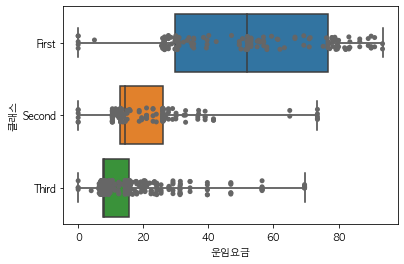

In [94]:
# boxplot + stripplot
plt.figure()
ax = sns.boxplot(y = 'class', x = 'fare', data = new_titanic, whis=np.inf) # whis : upper/lower whisker
ax = sns.stripplot(y = 'class', x = 'fare', data = new_titanic, jitter = True, color = '0.4') # 0: black, 1:white
ax.set_ylabel('클래스')
ax.set_xlabel('운임요금')

### 13. 바이올린 그래프(violinplot)
- sns.violinplot()
    - 매개변수
        - x : 그리고자 하는 컬럼을 명시
        - data : 대상이 되는 데이터프레임 지정
        - hue : 특성을 구분할 컬럼을 지정
        - palette: 색상 팔레트를 지정
- **KDE 플롯과 Box 플롯을 서로 조합**하여 그린 그래프
- 상자수염 그래프(=Box 플롯)과는 달리 커널 밀도 추정치를 이용하여 그래프를 그림
- 분포에 대한 결과를 보여주는 데는 효과적이나, 적은 샘플 사이즈를 이용하여 보여주는 경우 오해의 소지가 있을 수 있음
    - sample수가 적어지면 통계치에 오류가 많이 발생하기 때문에

<AxesSubplot:xlabel='sepal_length'>

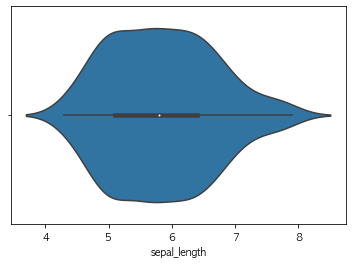

In [97]:
sns.violinplot(x='sepal_length', data=iris)

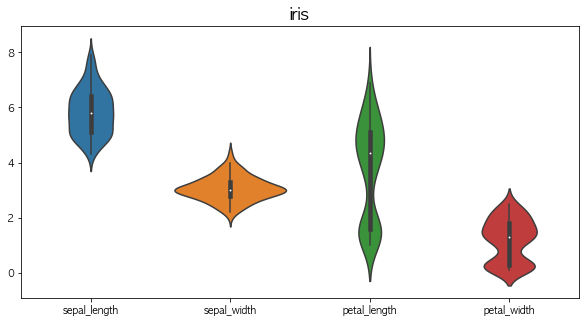

In [96]:
plt.figure(figsize = (10, 5))
sns.violinplot(data=iris)
plt.title('iris', fontsize = 17) # 높이 : 평균
plt.show()

Text(0.5, 1.0, '종에 따른 sepal length violin 분포')

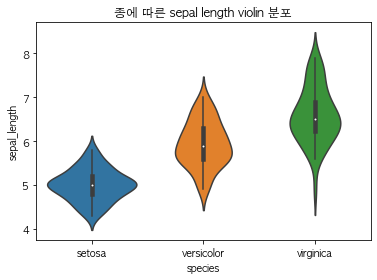

In [99]:
sns.violinplot(x='species', y = 'sepal_length', data=iris)
plt.title('종에 따른 sepal length violin 분포')

Text(0, 0.5, '나이')

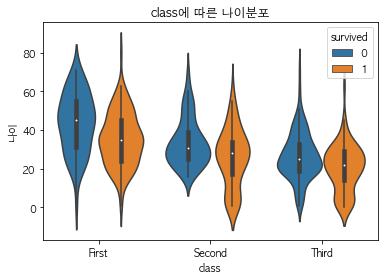

In [101]:
plt.figure()
ax = sns.violinplot(x = 'class', y = 'age', hue='survived', data = titanic)
ax.set_title('class에 따른 나이분포')
ax.set_xlabel('class')
ax.set_ylabel('나이')

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'age')

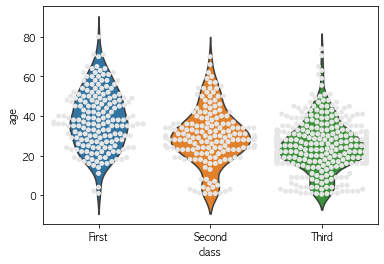

In [104]:
plt.figure()
sns.violinplot(x = 'class', y = 'age', data = titanic, inner = None) 
ax = sns.swarmplot(x = 'class', y = 'age', data = titanic, color = '0.9') # 0: black, 1:white
ax.set_xlabel('class')
ax.set_ylabel('age')

Text(0.5, 1.0, 'iris')

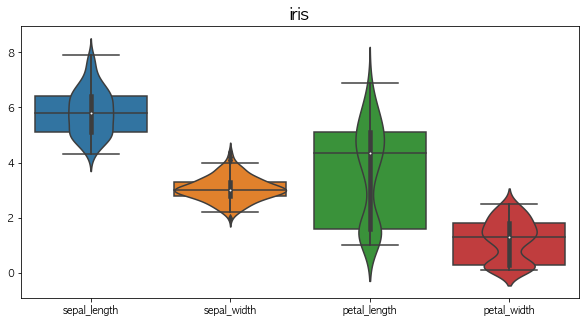

In [131]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = iris)
sns.violinplot(data=iris)
plt.title('iris', fontsize = 17)

### 14. stripplot
- stripplot : 일변량 데이터셋에 대하여 간략히 요약
    - **작은 데이터셋**을 다루는 용도로 사용됨
    - box 또는 violin 그래프의 보충적인 그래프로 사용
    - 항목
        - x, y : x축과 y축에 그려질 데이터
        - data : 데이터셋
        - hue : 특성 구분
        - dodge : hue 매개변수 사용시, dodge 매개변수의 값이 True면 범주형 데이터 축을 띠리서 데이터들을 분리
        - jitter : True면 데이터가 겹치지 않도록 함
        - size : 마커의 크기를 지정

Text(0, 0.5, '운임요금')

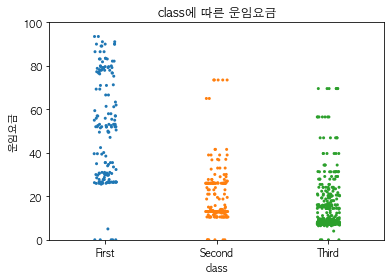

In [111]:
STRIP_SIZE = 3

plt.figure()
ax = sns.stripplot(x = 'class', y = 'fare', data = titanic, jitter = True, size = STRIP_SIZE)
# jitter = True 이므로 데이터들이 겹쳐서 보이지 않음
ax.set_ylim(0, 100)
ax.set_title('class에 따른 운임요금')
ax.set_xlabel('class')
ax.set_ylabel('운임요금')

Text(0, 0.5, '운임요금')

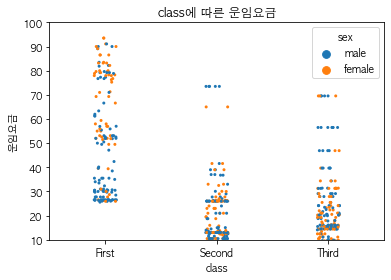

In [115]:
STRIP_SIZE = 3

plt.figure()
ax = sns.stripplot(x = 'class', y = 'fare', data = titanic, hue = 'sex', jitter = True, size = STRIP_SIZE)
ax.set_ylim(10, 100)
ax.set_title('class에 따른 운임요금')
ax.set_xlabel('class')
ax.set_ylabel('운임요금')

Text(0, 0.5, '운임요금')

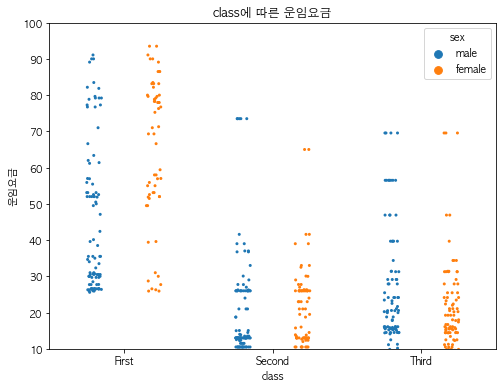

In [116]:
STRIP_SIZE = 3

plt.figure(figsize = (8, 6))
ax = sns.stripplot(x = 'class', y = 'fare', data = titanic, hue = 'sex', jitter = True, dodge = True, size = STRIP_SIZE)
ax.set_ylim(10, 100)
ax.set_title('class에 따른 운임요금')
ax.set_xlabel('class')
ax.set_ylabel('운임요금')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

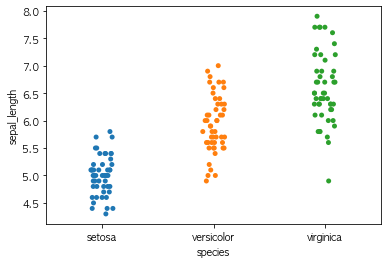

In [117]:
sns.stripplot(x='species', y = 'sepal_length', data=iris, jitter=True)

### 15. swarmplot
- swarmplot : stripplot와 유사하지만, 점들이 보정되어 서로 겹쳐지지 않음

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '나이')

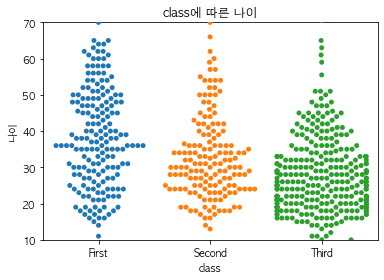

In [125]:
plt.figure()
ax = sns.swarmplot(x = 'class', y = 'age', data = titanic)
ax.set_ylim(10, 70)
ax.set_title('class에 따른 나이')
ax.set_xlabel('class')
ax.set_ylabel('나이')

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '나이')

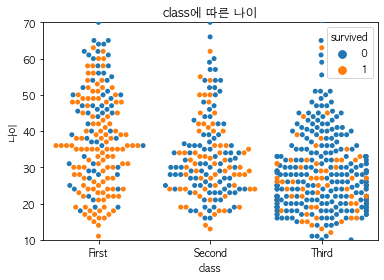

In [127]:
plt.figure()
ax = sns.swarmplot(x = 'class', y = 'age', data = titanic, hue = 'survived')
ax.set_ylim(10, 70)
ax.set_title('class에 따른 나이')
ax.set_xlabel('class')
ax.set_ylabel('나이')

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '나이')

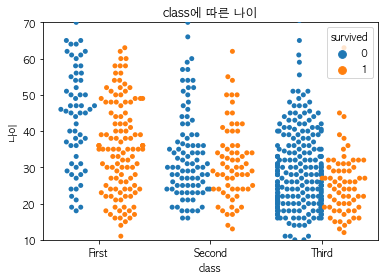

In [128]:
plt.figure()
ax = sns.swarmplot(x = 'class', y = 'age', data = titanic, hue = 'survived', dodge = True)
ax.set_ylim(10, 70)
ax.set_title('class에 따른 나이')
ax.set_xlabel('class')
ax.set_ylabel('나이')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

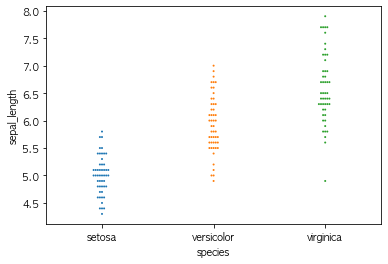

In [119]:
sns.swarmplot(x='species', y = 'sepal_length', data=iris, size=2)

### 16. catplot() : 서브플롯 시각화
- **sns.catplot(data=df, kind='옵션', col='강조할 열 이름', col_warp=개수)**
    - 한 행에 여러 개의 그래프가 배치되도록
    - kind
        - “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”.

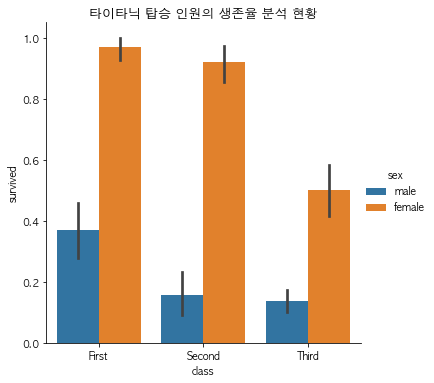

In [11]:
# 타이타닉 탑승 인원의 생존율 분석
sns.catplot(data=titanic, x = 'class', y= 'survived', hue = 'sex', kind='bar')
plt.title('타이타닉 탑승 인원의 생존율 분석 현황', fontsize=13);

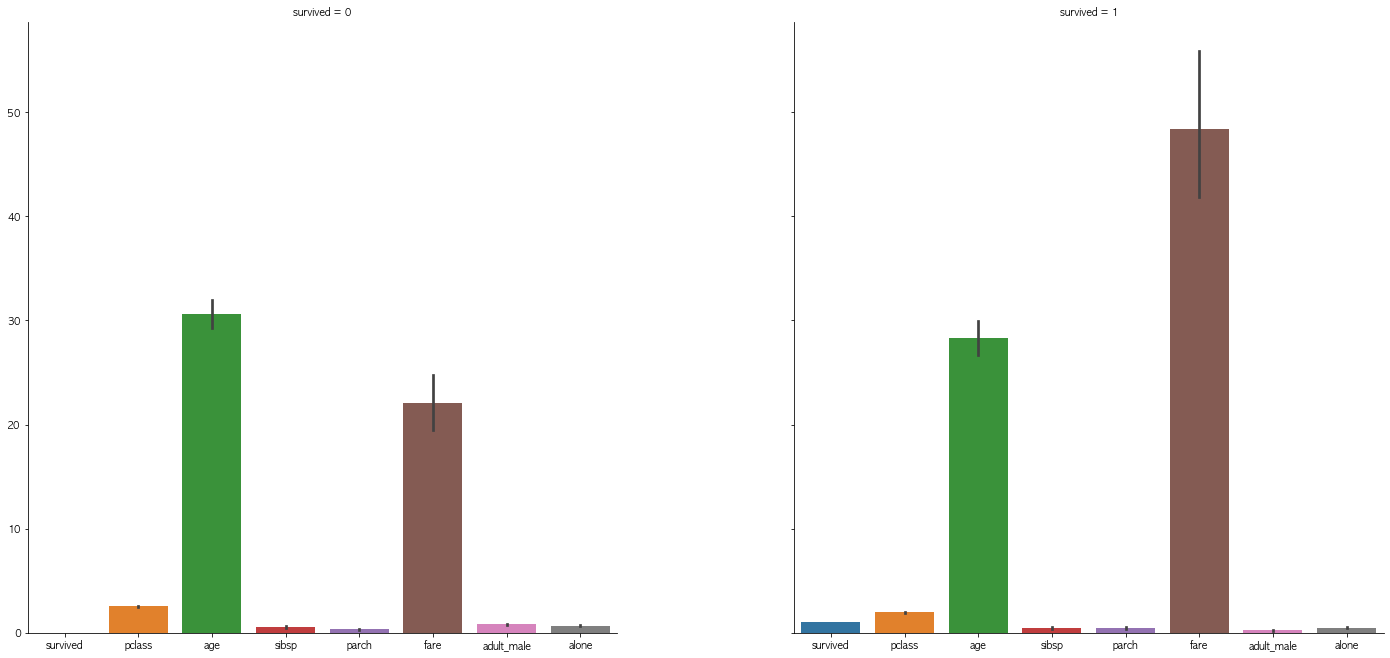

In [142]:
g= sns.catplot(data=titanic, kind='bar', col = 'survived')  # col_wrap = 한 행에 몇개?
g.fig.set_size_inches(20, 10)
g.fig.subplots_adjust(wspace=0.3, hspace=0.3) # 간격

     survived     sex   age     fare embarked   class    who deck  \
0           0    male  22.0   7.2500        S   Third    man  NaN   
1           1  female  38.0  71.2833        C   First  woman    C   
2           1  female  26.0   7.9250        S   Third  woman  NaN   
3           1  female  35.0  53.1000        S   First  woman    C   
4           0    male  35.0   8.0500        S   Third    man  NaN   
..        ...     ...   ...      ...      ...     ...    ...  ...   
886         0    male  27.0  13.0000        S  Second    man  NaN   
887         1  female  19.0  30.0000        S   First  woman    B   
888         0  female   NaN  23.4500        S   Third  woman  NaN   
889         1    male  26.0  30.0000        C   First    man    C   
890         0    male  32.0   7.7500        Q   Third    man  NaN   

     embark_town alive  
0    Southampton    no  
1      Cherbourg   yes  
2    Southampton   yes  
3    Southampton   yes  
4    Southampton    no  
..           ...   ..

(0.0, 100.0)

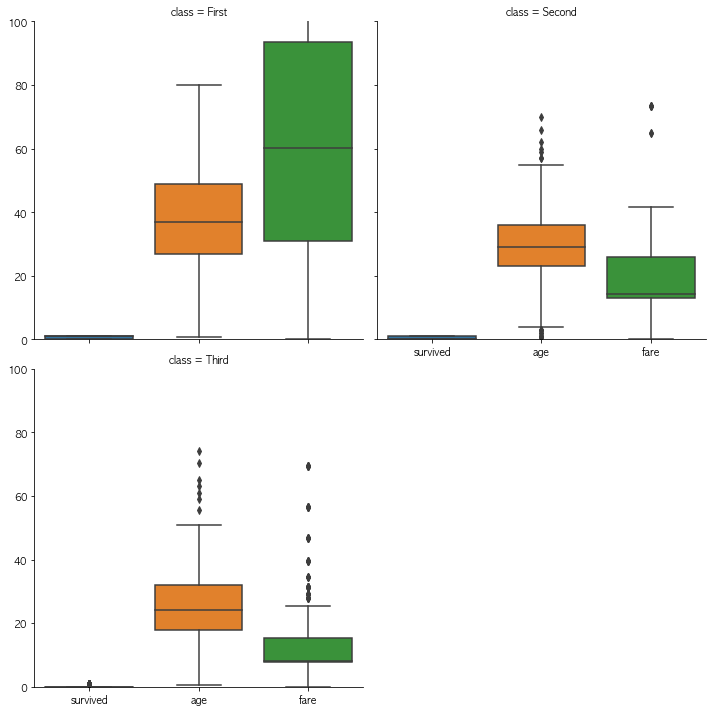

In [147]:
new_titanic = titanic.drop(['pclass', 'sibsp', 'parch', 'adult_male', 'alone'], axis = 1)
print(new_titanic)

sns.catplot(data = new_titanic, kind = 'box', col = 'class', col_wrap = 2)
plt.ylim(0, 100)

## matplotlib
## 그래프 수정 옵션 :: 선스타일-마커-색상
- 선 스타일
    - '-' : 실선
    - '--' : 파선
    - ':' : 점선
    - '-.' : 일점 쇄선
- 마커 기호 지정
    - '+' : 플러스 기호
    - 'o' : 원
    - '*' : 별
    - '.' : 점
    - '+' : 십자형
    - 'x', 'X' : 엑스자형
    - 's', 'square' : 정사각형
    - 'd', 'diamond' : 다이아몬드형
    - '^' : 위쪽 방향 삼각형
    - '<' : 왼쪽 방향 삼각형
    - '>' : 오른쪽 방향 삼각형
    - 'v' : 아래쪽 방향 삼각형
    - 'p', 'pentagram' : 오각형
    - 'h', 'hexagram' : 육각형
- 색상 지정
    - r : 빨
    - g : 녹
    - b : 파
    - c : 녹청
    - m : 자홍
    - y : 노란
    - k : 검정
    - w : 흰


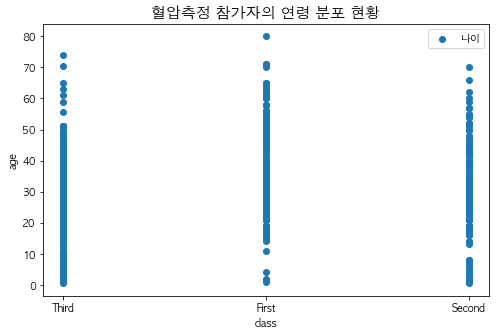

In [158]:
# x축과 y축 좌표 설정
x = titanic['class']
y = titanic['age']

# 산점도 그래프 환경 설정 (후)
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.title('혈압측정 참가자의 연령 분포 현황', fontsize=15)
plt.xlabel('class')
plt.ylabel('age')
plt.legend(['나이'])
# plt.savefig('1_혈압측정 참가자의 연령 분포 현황.png')

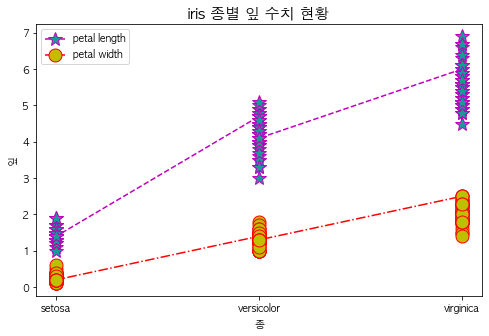

In [169]:
plt.figure(figsize=(8, 5))

x1 = iris['species']
y1 = iris['petal_length']
plt.plot(x1, y1, '--*m', markersize = 15, markerfacecolor=[0.1, 0.6, 0.6]) # '--*m' -> '*m'

x2 = iris['species']
y2 = iris['petal_width']
plt.plot(x2, y2, '-.or', markersize = 13, markeredgecolor = 'r', markerfacecolor = 'y')

plt.title('iris 종별 잎 수치 현황', fontsize = 15)
plt.xlabel('종')
plt.ylabel('잎')
# plt.ylim(0,100)
plt.legend(['petal length', 'petal width'])


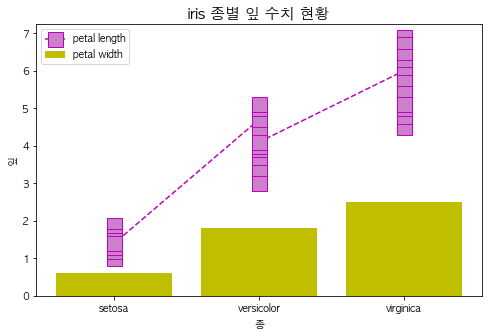

In [172]:
plt.figure(figsize=(8, 5))

x1 = iris['species']
y1 = iris['petal_length']
plt.plot(x1, y1, '--sm', markersize = 15, markerfacecolor=[0.8, 0.5, 0.8]) # '--*m' -> '*m'

x2 = iris['species']
y2 = iris['petal_width']
plt.bar(x2, y2, color = 'y')

plt.title('iris 종별 잎 수치 현황', fontsize = 15)
plt.xlabel('종')
plt.ylabel('잎')
# plt.ylim(0,100)
plt.legend(['petal length', 'petal width'])

## basic graph
### pandas를 이용한 graph kind 옵션
- 선 그래프 : df.plot(kind='line'), df.plot()
- 수직 막대 그래프 : df.plot(kind='bar')
- 수평 막대 그래프 : df.plot(kind='barh')
- 히스토그램 : df.plot(kind='hist')
- 박스 플롯 : df.plot(kind='bax')
- 커널 밀도 그래프 : df.plot(kind='kde')
- 면적 그래프 : df.plot(kind='area')
- 파이 그래프 : df.plot(kind='pie')
- 산점도 그래프 : df.plot(kind='scatter')
- 고밀도 산점도 그래프 : df.plot(kind='hexbin')

['setosa' 'versicolor' 'virginica']


<AxesSubplot:>

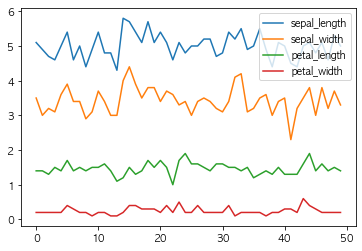

In [179]:
# line
print(iris['species'].unique())
setosa.plot()

<AxesSubplot:>

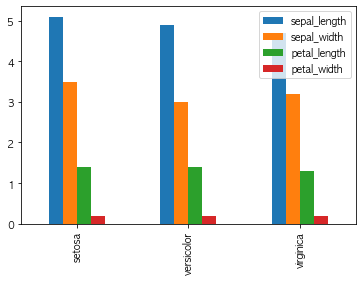

In [186]:
# bar
new_iris = iris.iloc[[0, 1, 2],:4]
new_iris.index=['setosa', 'versicolor', 'virginica']
new_iris.plot(kind='bar')

<AxesSubplot:>

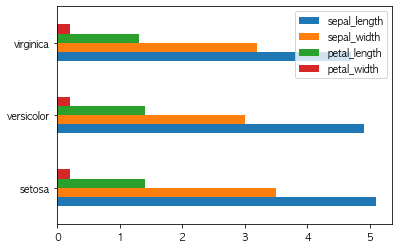

In [187]:
# barh
new_iris = iris.iloc[[0, 1, 2],:4]
new_iris.index=['setosa', 'versicolor', 'virginica']
new_iris.plot(kind='barh')

<AxesSubplot:>

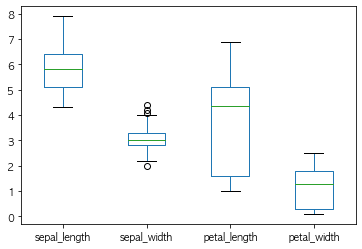

In [195]:
new_iris = iris.iloc[:,:4]
new_iris.plot(kind='box')

<AxesSubplot:ylabel='Density'>

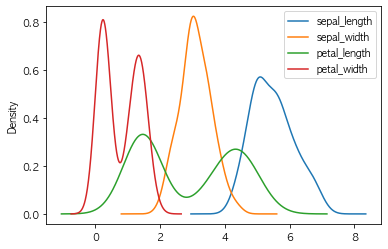

In [196]:
new_iris = iris.iloc[:100,:4]
# new_iris.index=['setosa', 'versicolor', 'virginica']
new_iris.plot(kind='kde')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

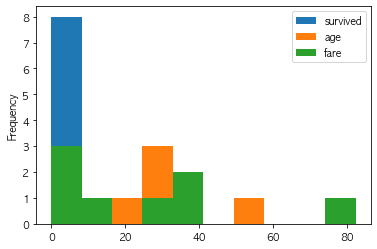

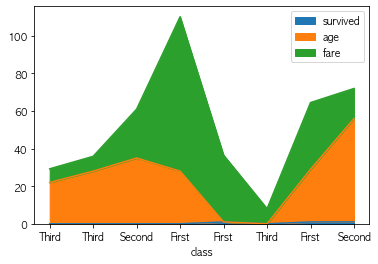

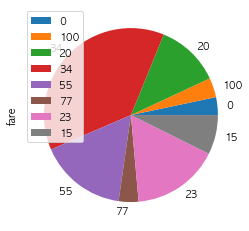

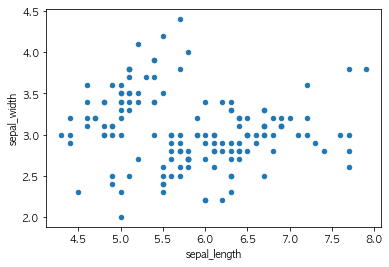

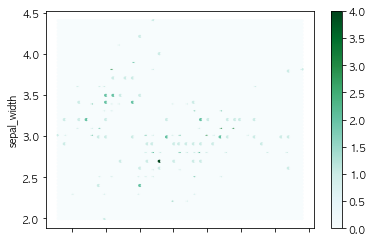

In [244]:
# 그 외 그래프
new_titanic = titanic.loc[[0, 100, 20, 34, 55, 77, 23, 15], ['survived', 'age', 'fare', 'class']]
new_titanic.plot(kind = 'hist') # histogram
new_titanic.plot(kind = 'area', x= 'class') # 면적 그래프
new_titanic.plot(kind = 'pie', y = 'fare') # pie graph

new_iris = iris.drop(['species'], axis = 1)
new_iris.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width') # 산점도 그래프
new_iris.plot(kind = 'hexbin', x = 'sepal_length', y = 'sepal_width') # 고밀도 산점도 그래프

## 특별한 그래프

1. 범주형 플로팅 : catplot
2. 밀도 곡선 : kdeplot
3. lollipop chart : vlines, scatter
4. 정렬된 막대 그래프 : vlines
5. tree map : squarify
6. stem plotting : stem

### 1. catplot
- kind 파라미터 : 그래프 모양이 달라짐
- col_wrap : 3개로 나눔
- aspect : 가로세로 너비 (세로 : height, 가로 : height*aspect)

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, '제목')

<Figure size 1280x800 with 0 Axes>

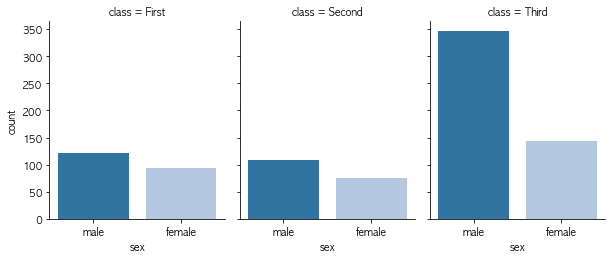

In [12]:
fig = plt.figure(figsize=(16, 10), dpi= 80)
sns.catplot('sex', col='class', col_wrap=3,
                data=titanic, kind="count", height=3.5,
                aspect=.8, palette='tab20')
fig.suptitle('제목')

### 2. 밀도 곡선

['Third', 'First', 'Second']
Categories (3, object): ['Third', 'First', 'Second']


/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


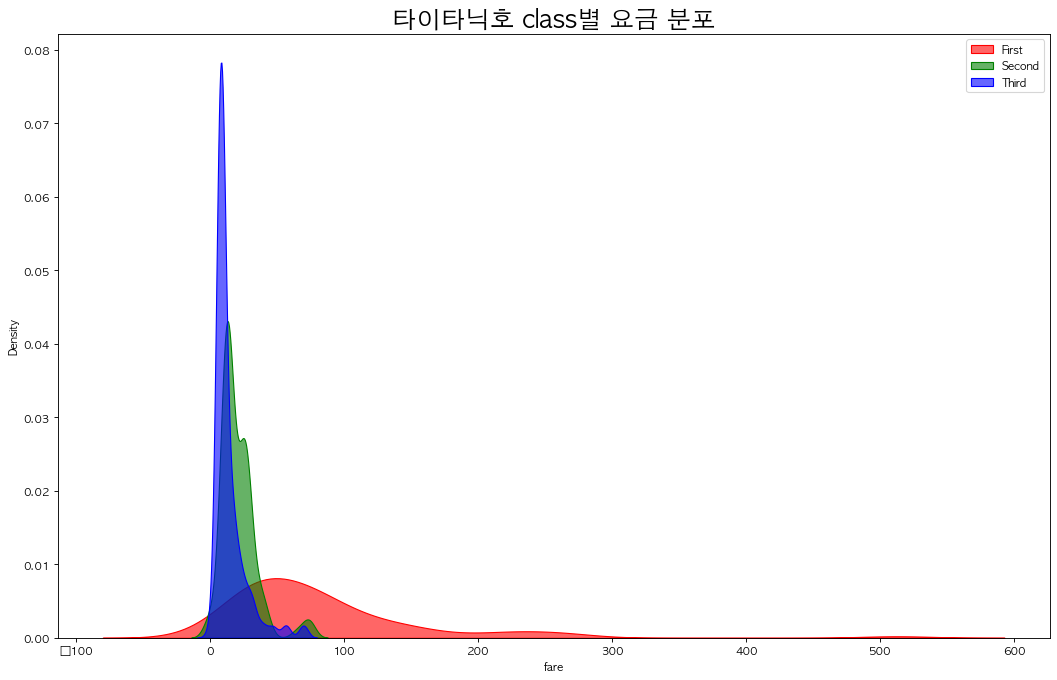

In [13]:
print(titanic['class'].unique())

plt.figure(figsize=(16,10), dpi= 80)
MY_ALPHA = 0.6
sns.kdeplot(titanic.loc[titanic['class'] == 'First', 'fare'], shade=True, color="r", label="First", alpha=MY_ALPHA)
sns.kdeplot(titanic.loc[titanic['class'] == 'Second', 'fare'], shade=True, color="g", label="Second", alpha=MY_ALPHA)
sns.kdeplot(titanic.loc[titanic['class'] == 'Third', 'fare'], shade=True, color="b", label="Third", alpha=MY_ALPHA)

plt.title('타이타닉호 class별 요금 분포', fontsize=22)
plt.legend()

# cnt += 1
# savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
# plt.savefig(savefile, dpi=400)
# print(savefile + ' 파일이 저장되었습니다.')
################################################################################

### 3. Lollipop chart
- 막대 그래프와 원 그래프의 복합형 그래프
- 막대는 변위를 나타내고, 끝에 원을 그려서 해당 데이터를 부각시킴
- 범주형 데이터 비교에 유용하게 사용

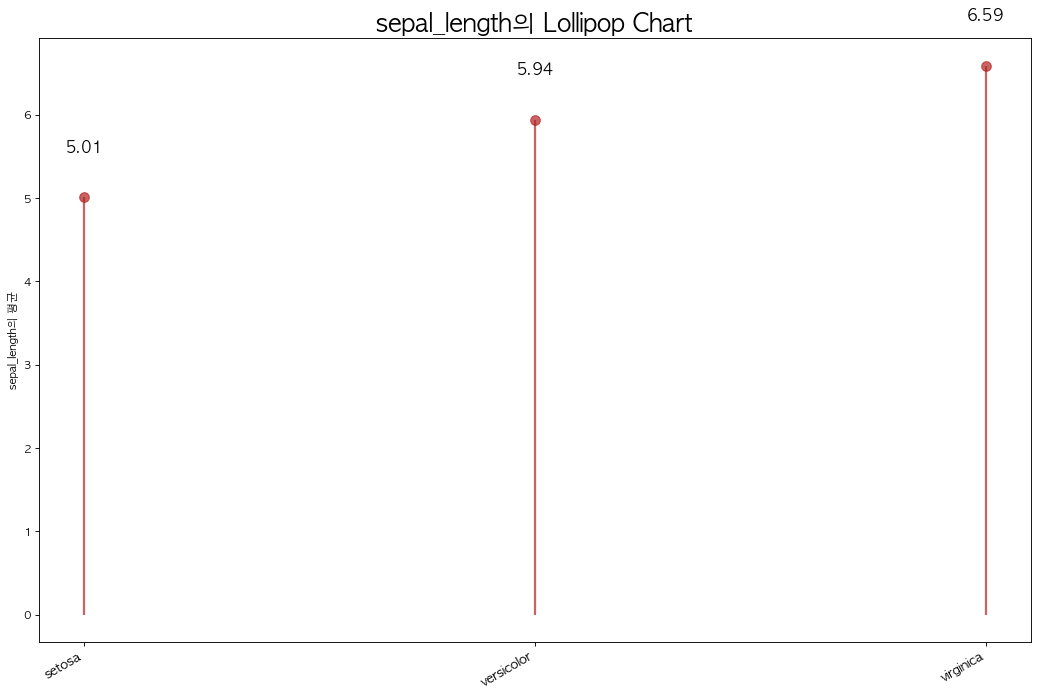

In [19]:
new_iris = iris[['sepal_length', 'species']].groupby('species').apply(lambda x: x.mean()) # sepal_length의 평균
new_iris.sort_values('sepal_length', inplace=True) # 평균을 오름차순으로 sort
new_iris.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)

# 수직선
ax.vlines(x=new_iris.index, ymin=0, ymax=new_iris.sepal_length, color='firebrick', alpha=0.7, linewidth=2)

# 상단의 점 :: s 파라미터 - marker size
ax.scatter(x=new_iris.index, y=new_iris.sepal_length, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('sepal_length의 Lollipop Chart', fontdict={'size':22})
ax.set_ylabel('sepal_length의 평균')
ax.set_xticks(new_iris.index)
ax.set_xticklabels(new_iris.species.str.lower(), rotation=30, fontdict={'horizontalalignment': 'right', 'size':12})

# 상단에 그려 주는 소득 정보 텍스트
for row in new_iris.itertuples():
    ax.text(row.Index, row.sepal_length+.5, s=round(row.sepal_length, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

### 4. 정렬된 막대 그래프
- 값을 기반으로 정렬하기 위해 :: sort_values()함수 사용
- 기본 값은 오름차순 정렬 방식

new_titanic
   embark_town       fare
0   Queenstown  13.276030
1  Southampton  27.079812
2    Cherbourg  59.954144
new_titanic.index
RangeIndex(start=0, stop=3, step=1)


([<matplotlib.axis.XTick at 0x7f8ef5b7ac70>,
 [Text(0, 0, 'queenstown'),
  Text(1, 0, 'southampton'),
  Text(2, 0, 'cherbourg')])

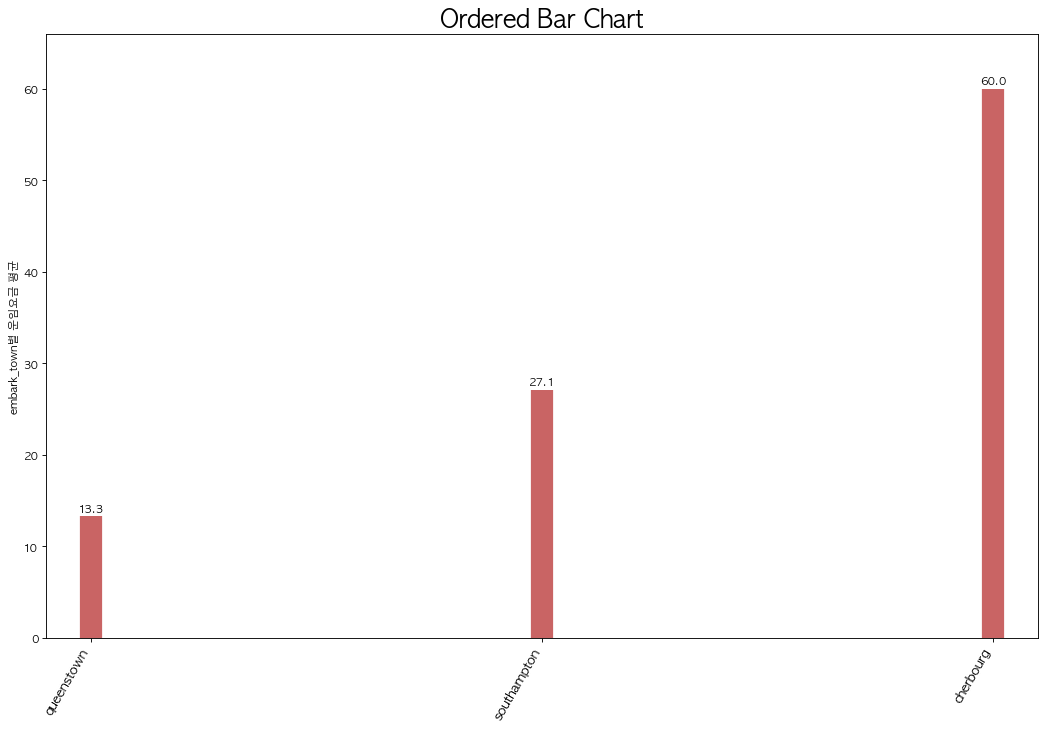

In [29]:
new_titanic = titanic[['fare', 'embark_town']].groupby('embark_town').apply(lambda x: x.mean())
new_titanic.sort_values('fare', inplace=True) # gallon 당 고속도로 주행 마일 수
new_titanic.reset_index(inplace=True)

print('new_titanic')
print(new_titanic)

print('new_titanic.index')
print(new_titanic.index)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=new_titanic.index, ymin=0, ymax=new_titanic.fare, color='firebrick', alpha=0.7, linewidth=20) # linewidth를 조절하면 barchart

# Annotate Text : Bar의 상단에 수치 데이터를 보여 줍니다.
for i, income in enumerate(new_titanic.fare):
    ax.text(i, income+0.5, round(income, 1), horizontalalignment='center') # 소수점 자리 첫번째까지 이기 때문에 round(, 1)

# 그래프 제목, y축 상하한선, c축 Ticks 정의
ax.set_title('Ordered Bar Chart', fontdict={'size':22})
ax.set(ylabel='embark_town별 운임요금 평균', ylim=(0, 66))
plt.xticks(new_titanic.index, new_titanic.embark_town.str.lower(), rotation=60, horizontalalignment='right', fontsize=12)

### 5. tree map
- 많은 트리 구조의 데이터를 표시하는데 적합

new_titanic
    class  counts
0   First     216
1  Second     184
2   Third     491
labels
0     First\n (216)
1    Second\n (184)
2     Third\n (491)
dtype: object
sizes
[216, 184, 491]
colors
[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0), (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0)]


(0.0, 100.0, 0.0, 100.0)

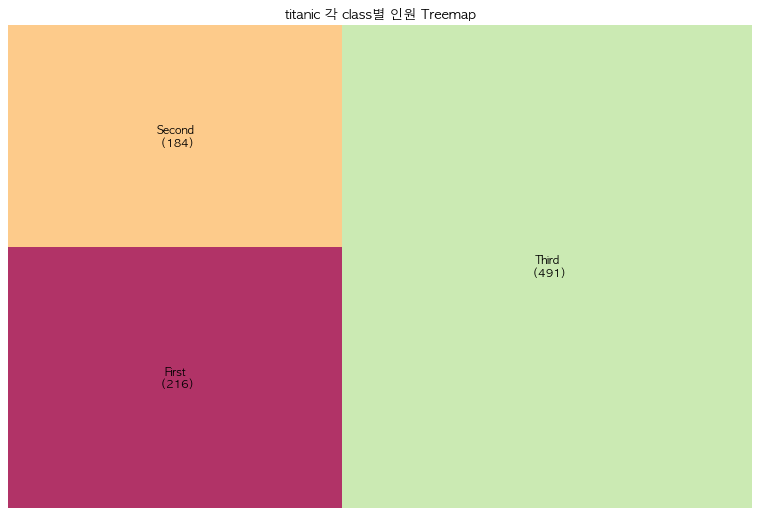

In [32]:
import squarify

new_titanic = titanic.groupby('class').size().reset_index(name='counts') # 순서 : 가나다 순
print('new_titanic')
print(new_titanic)

labels = new_titanic.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1) # \n 다음 줄에 출력하기 위함
print('labels') # 각 셀에 들어갈 레이블 텍스트
print(labels)

sizes = new_titanic['counts'].values.tolist()

print('sizes')
print(sizes)

colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

print('colors')
print(colors)

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('titanic 각 class별 인원 Treemap')
plt.axis('off')

### 6. stem plotting
- stem plot은 각 x에 해당하는 위치에 기본 선으로부터 수직선을 그려주는 그래프

<StemContainer object of 3 artists>

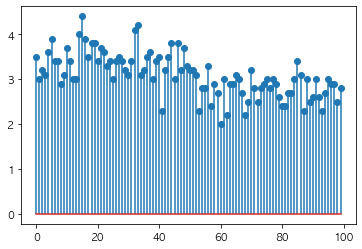

In [30]:
new_iris = iris['sepal_width'].head(100) # sepal width 100개

plt.figure()
x = np.arange(len(new_iris))
y = np.array(new_iris)

plt.stem(x, y)